In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

**Estimating the probability distribution of a travel demand forecast** Authors: John L. Bowman, Dinesh Gopinath, and Moshe Ben-Akiva

### <font color = 'blue'>Algorithm</font>


1. **Identify variables that induce error in Toll Revenue prediction :** $x = (x_1, x_2, ...,x_k, ..., x_K)$
    - Simple Toll Revenue Model - Variables that induce error in Toll Revenue Prediction $r^{(p)}$ are: (1) Value of Time, (2) Population, (3) Households, (4) Employment
    - Let: $x_1$ = Value of Time, $x_2$ = Population, $x_3$ = Households, $x_4$ = Employment. Thus K = 4, i.e. 4-Dimensional space of possible outcomes $x_k$
    - $x = (x_1, x_2, x_3, x_4)$
    
2. **Obtain probability distribution of $x_k$ for k = 1, 2, ..., K. Distribution can be based on: (a) Direct input or (b) Assumption, e.g. Triangular, Normal, etc.** For each dimension $k$ discretize an assumed probability distribution and identify a small set of discrete outcomes $x_k^{n_k}$, where $n_k$ = 1, 2, 3, ..., $N_k$ <font color = 'SeaGreen'>(assign probabilities $p(x_k^{n_k})$ to these discrete outcomes based on reasoning and empirical evidence to approximate $x_k$'s true distribution???)</font>:
    - Let $N_1$ = 4, $N_2$ = 3, $N_3$ = 5, $N_4$ = 4 and $x_k$ = {$x_k^1, x_k^2, x_k^3, ..., x_k^{N_k}$}
    - $x_1$ discrete outcomes = {$x_1^1, x_1^2, x_1^3, x_1^4$}, with $p(x_1^1) + p(x_1^2) + p(x_1^3) + p(x_1^4) = 1$
    - $x_2$ discrete outcomes = {$x_2^1, x_2^2, x_2^3$}, with $p(x_2^1) + p(x_2^2) + p(x_2^3) = 1$
    - $x_3$ discrete outcomes = {$x_3^1, x_3^2, x_3^3, x_3^4, x_3^5$}, with $p(x_3^1) + p(x_3^2) + p(x_3^3) + p(x_3^4) + p(x_3^5) = 1$
    - $x_4$ discrete outcomes = {$x_4^1, x_4^2, x_4^3, x_4^4$}, with $p(x_4^1) + p(x_4^2) + p(x_4^3) + p(x_4^4) = 1$
    
3. **Develop Toll Revenue Model for Baseline Scenario :** - Get Predicted $r^{(p)}_{base}$ for Baseline Scenario $x = (x_1^{base}, x_2^{base}, x_3^{base}, x_4^{base})$ from output of the model
    
4. **Run Toll Revenue Model one time for each variable that induce error in prediction :** 
    - Get predicted $r^{(p)}_{k=1}$ based on $x = (x_1^{extreme}, x_2^{base}, x_3^{base}, x_4^{base})$
    - Get predicted $r^{(p)}_{k=2}$ based on $x = (x_1^{base}, x_2^{extreme}, x_3^{base}, x_4^{base})$
    - Get predicted $r^{(p)}_{k=3}$ based on $x = (x_1^{base}, x_2^{base}, x_3^{extreme}, x_4^{base})$
    - Get predicted $r^{(p)}_{k=4}$ based on $x = (x_1^{'}, x_2^{'}, x_3^{'}, x_4^{''})$

5. **Calculate change in Predicted Toll Revenue and variables that induce error in prediction :** 
    - $r_k^{change} = \frac{r^{(p)}_{base} - r^{(p)}_{k}}{r^{(p)}_{k}}$, where k = 1, 2, 3, 4
    - $x_k^{change} = \frac{x^{base}_{1} - x^{''}_{k}}{x^{''}_{k}}$, where k = 1, 2, 3, 4 
    
6. **Calculate Elasticity of Toll Revenue with respect to variables that induce error in prediction :**
    - $e_k^{r} = \frac{r_k^{change}}{x_k^{change}}$, where k = 1, 2, 3, 4
    
7. **Define a set of scenarios: ** S = {$(x_1^{n_1}, ..., x_k^{n_k}, ..., x_K^{N_k}); n_k = 1, 2, 3, ..., N_k; k = 1, 2, ..., K$}, covering all combinations of the discrete coutcomes in all $K$ = 4 dimensions
    - For simple example, S = {$(x_1^1, x_2^1, x_3^1, x_4^1), (x_1^1, x_2^1, x_3^1, x_4^2), ..., (x_1^1, x_2^3, x_3^5, x_4^4), ..., (x_1^4, x_2^3, x_3^5, x_4^4) $}
    - Number of scenarios in S = $\prod_{k = 1}^{K} N_k$. Thus the number of scenarios in simple example is S = 4 x 3 x 5 x 4 = 240. Thus s = 1, 2, 3, ..., 240
    - Using s as a 1-Dimensional index of the member of S: Refer to a single member of S as $x^{(s)} = (x_1^{(s)}, x_2^{(s)}, ..., x_k^{(s)}, ..., x_K^{(s)})$. For simple example: $x^{(s = 1)} = (x_1^{1}, x_2^{1}, x_3^{1}, x_4^{1})$; $x^{(s = 2)} = (x_1^{1}, x_2^{1}, x_3^{1}, x_4^{2})$; $x^{(s = 240)} = (x_1^{4}, x_2^{3}, x_3^{5}, x_4^{4})$

8. **Calculate the probability of each scenario: ** Error variables are mutually independent, thus the probability of each scenario is given by: <font color='blue'>$p(s) = \prod_{k = 1}^{K} p(x_k^{(s)}), s \in S$</font>, thus for simple example:
    - $p(s = 1) = \prod_{k = 1}^{4} p(x_k^{(s = 1)}) = p(x_1^{1}) p(x_2^{1}) p(x_3^{1}) p(x_4^{1})$
    - $p(s = 2) = \prod_{k = 1}^{4} p(x_k^{(s = 2)}) = p(x_1^{1}) p(x_2^{1}) p(x_3^{1}) p(x_4^{2})$
    - $p(s = 240) = \prod_{k = 1}^{4} p(x_k^{(s = 240)}) = p(x_1^{4}) p(x_2^{4}) p(x_3^{5}) p(x_4^{4})$

9. **Calculate Toll Revenue for scenario s, <font color='blue'>$r^{(s)} = r^{(p)}_{base}\prod_{k = 1}^{K}\Big(\frac{x_k^{(s)}}{x_k^{base}}\Big)^{e_k^r}, s \in S$</font>**, thus for simple example:
    - $r^{(s = 1)} = r^{(p)}_{base}\prod_{k = 1}^{4}\Big(\frac{x_k^{(s=1)}}{x_k^{base}}\Big)^{e_k^r}$ = $r^{(p)}_{base}\Big(\frac{x_1^{1}}{x_1^{base}}\Big)^{e_1^r}\Big(\frac{x_2^{1}}{x_2^{base}}\Big)^{e_2^r}\Big(\frac{x_3^{1}}{x_3^{base}}\Big)^{e_3^r}\Big(\frac{x_4^{1}}{x_4^{base}}\Big)^{e_4^r}$
    - $r^{(s = 2)} = r^{(p)}_{base}\prod_{k = 1}^{4}\Big(\frac{x_k^{(s=2)}}{x_k^{base}}\Big)^{e_k^r}$ = $r^{(p)}_{base}\Big(\frac{x_1^{1}}{x_1^{base}}\Big)^{e_1^r}\Big(\frac{x_2^{1}}{x_2^{base}}\Big)^{e_2^r}\Big(\frac{x_3^{1}}{x_3^{base}}\Big)^{e_3^r}\Big(\frac{x_4^{2}}{x_4^{base}}\Big)^{e_4^r}$
    - $r^{(s = 240)} = r^{(p)}_{base}\prod_{k = 1}^{4}\Big(\frac{x_k^{(s=240)}}{x_k^{base}}\Big)^{e_k^r}$ = $r^{(p)}_{base}\Big(\frac{x_1^{4}}{x_1^{base}}\Big)^{e_1^r}\Big(\frac{x_2^{3}}{x_2^{base}}\Big)^{e_2^r}\Big(\frac{x_3^{5}}{x_3^{base}}\Big)^{e_3^r}\Big(\frac{x_4^{4}}{x_4^{base}}\Big)^{e_4^r}$
    
10. **Using pairs $r^{(s)}$ and $p(s)$ Plot Revenue CDF**


### <font color = 'blue'>Sources of Uncertainty - Toll (Kockleman)</font>


- Estimates of trip generation  
- Estimates of land development  
- Models: Trip Generation, Trip Distribution, Mode Choice  
- Toll-technology adoption rates  
- Hetrogeneity in (VOT) Value of Time savings  
- Network attributes - Traffic congestion (low-volume corridors have greater uncertanity in their forecasts)  
- Uncertainty in land development patterns  
- Demographic and employment projections  
- Tolling design - shadow tolls (govt. pays the concessionaire an amount based n toll road use - similar to toll free) or user-paid tolls (drivers willingness to pay is more complex and difficult to understand - more forecasting risk)  
- Tolling culture of a region, i.e. the degree to which tolls have been used in the past  
- Travel demand model imperfections (Heterogenity of VOT is ignored, Variable tolls or HOT lanes that are free at certain hours)  
- Competitive advantage - Toll on the only bridge vs toll on freeway - more options to route  
- User attributes - toll facilities serving a small market segment of travelers allow more reliable forecasts vs hetrogenous populations  
- Road location, configurations  
- Demand variations over times of days and days of the year also affect forecast reliability  
- Brian and Wilkins (2002) - poorly estimated VOTT's, economic downturns, mis-prediction of future land use patterns, lower than predicted time savings, added competition, lower than anticipated truck usage, high variability in traffic volumes  
- Economic growth and related changes in income and employment  
- Total Demand Model errors  
- Model error in elasticity of demand
- Value of time  
- Errors in measurement of network times and costs  
- Operating speed  
- Roadway improvements 

# Texas North Tarrant Express Segment 3A  

- Revenue and Transaction Forecast Year = 2035  

**2035 Revenue and Transactions**   

- Forecasted 2035 Annual Project Revenue (000's 2011 Dollars) = 99842 
- Forecasted 2035 Daily Transactions = 63635 

**<font color = 'green'>Truck VOT Calculations</font>**

- SOV VOT - Lognormal distribution with mean = \$18.59 and standard deviation = \$7.4 ($\mu$ = 2.849 and $\sigma$ = 0.383)  
- Coefficient of variation, $C_v^{sov} = \frac{7.4}{18.59}$ = 0.398  
- HHM Truck VOT: Mean = \$36.48 and Standard deviation = \$30.24  
- AECOM Truck VOT: Mean = \$60.76 and Standard deviation = \$51.08  
- $Average Truck VOT$ = $\frac{HHM Truck VOT + AECOM  Truck VOT}{2}$ = \$48.62  
- Standard deviation of Average Truck VOT = $C_v^{sov} * Average Truck VOT$ = \$19.35 ($\mu$ = 3.811 and $\sigma$ = 0.383, calculations below)  
- $\mu \sigma$

In [2]:
# Parameters for Truck Lognormal Distribution
m = 48.62
s = 19.35
truck_ln_mu = np.log(m/np.sqrt(1+((s**2)/(m**2))))
truck_ln_sigma = np.sqrt(np.log(1+((s**2)/(m**2))))
print 'truck_ln_mu = %1.3f' % truck_ln_mu
print 'truck_ln_sigma = %1.3f' % truck_ln_sigma

truck_ln_mu = 3.811
truck_ln_sigma = 0.383


> $r_{base}^{(p)}$ = 74754 (000's 2011 Dollars)

**<font color = 'blue'>Variables: Sources of Uncertainty</font>**  

- **Truck VOT: $x_1$**
    - Elasticity of Revenue to Truck VOT = 0.994  
    - $x_1^{base}$ = \$60.76  
    - Probability distribution: Lognormal with mean = \$48.62 and std. dev = \$19.35 ($\mu$ = 3.811 and $\sigma$ = 0.383)  
- **Travel Demand: $x_2$**
    - Elasticity of Revenue to Demand (Transactions as proxy) = 2.57  
    - $x_2^{base}$ = 61056  
    - Probability distribution: Normal with $\mu$ = 58871.5 and $\sigma$ = 2184.5  
- **Car VOT Growth: $x_3$**  
    - Elasticity of Revenue to Car VOT Growth = 0.19  
    - $x_3^{base}$ = 2.1%  
    - Probability distribution: Triangular with Min = 0.5%, Mean = 1.05%, and Max = 2.1%  
- **Truck VOT Growth: $x_4$**  
    - Elasticity of Revenue to Truck VOT Growth = 0.19  
    - $x_4^{base}$ = 2.5%  
    - Probability distribution: Triangular with Min = 0.5%, Mean = 1.25%, and Max = 2.5%  
    
      


**Truck VOT Probability Distribution:** Lognormal

Probability Sum = 0.9946
N_1 = 60


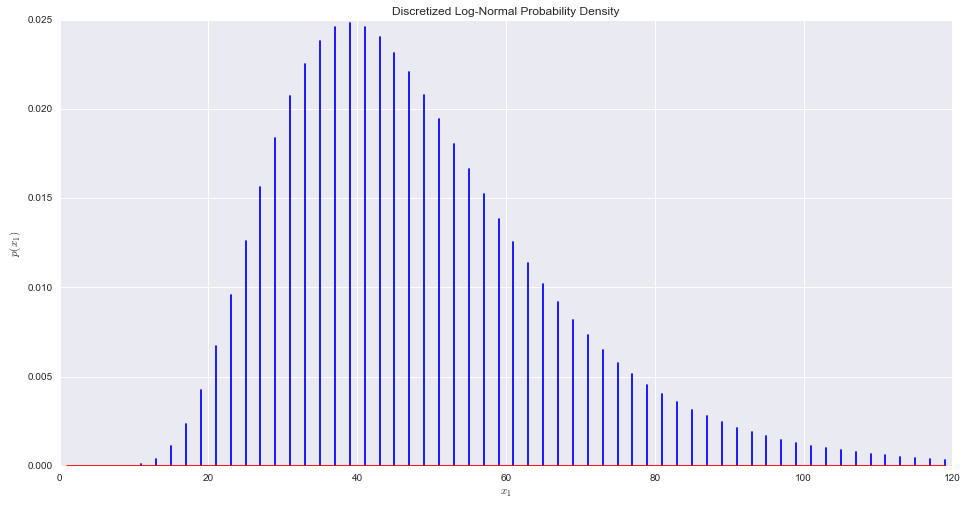

In [3]:
mu = 3.811
sigma = 0.383 

low = 1
high = 120

dx_1 = 2 # Length of interval

# Comb points along x axis
x_1 = np.arange(low, high, dx_1)

# Compute y values: pdf at each value of x
vot_y = (1/(sigma * x_1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.log(x_1) - mu)/sigma) ** 2)

# Plot the function
plt.figure(figsize = (16, 8))
plt.stem(x_1, vot_y, markerfmt = ' ') # This draws the intervals
plt.xlabel('$x_1$')
plt.ylabel('$p(x_1)$')
plt.title('Discretized Log-Normal Probability Density')

area = np.sum(dx_1 * vot_y)
print 'Probability Sum = %1.4f' % area
print 'N_1 = %d' % len(x_1)

temp1 = np.array([x_1, vot_y * dx_1])


**Travel Demand Probability Distribution:** Normal

In [4]:
# Mean Transactions = (2035 Transactions + 2018 Transactions)/2
print 'Mean Transactions = %s' % ((63635+40086)/2.0)
# Std Dev Transactions = (2035 Transactions - 2018 Transactions)/2
print 'Std. Dev Transactions = %s' % ((63635-40086)/2.0)

Mean Transactions = 51860.5
Std. Dev Transactions = 11774.5


Probability Sum = 0.9978
N_2 = 36


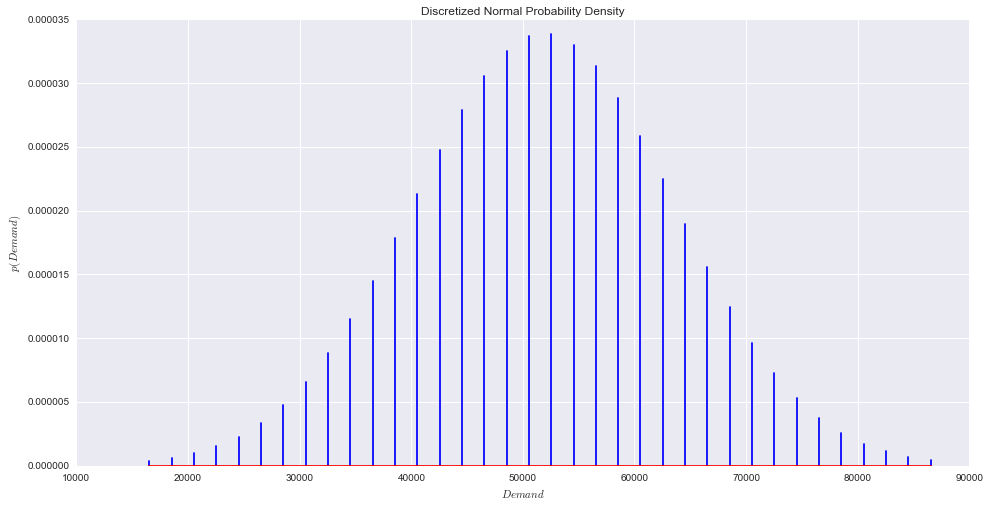

In [5]:
demand_mean = 51860.5
demand_sd = 11774.5
demand_low = demand_mean - 3 * demand_sd # low end of x axis
demand_high = demand_mean + 3 * demand_sd # high end of x axis

dx_2 = 2000 # Length of interval

# Comb points along x axis
x_2 = np.arange(demand_low, demand_high, dx_2)

# Compute y values: pdf at each value of x
demand_y = (1/(demand_sd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_2 - demand_mean)/demand_sd) ** 2)

# Plot the function
plt.figure(figsize = (16, 8))
plt.stem(x_2, demand_y, markerfmt = ' ') # This draws the intervals
plt.xlabel('$Demand$')
plt.ylabel('$p(Demand)$')
plt.title('Discretized Normal Probability Density')

area = np.sum(dx_2 * demand_y)
print 'Probability Sum = %1.4f' % area
print 'N_2 = %d' % len(x_2)

**Car VOT Growth Probability Distribution:** Triangular

20
1.0


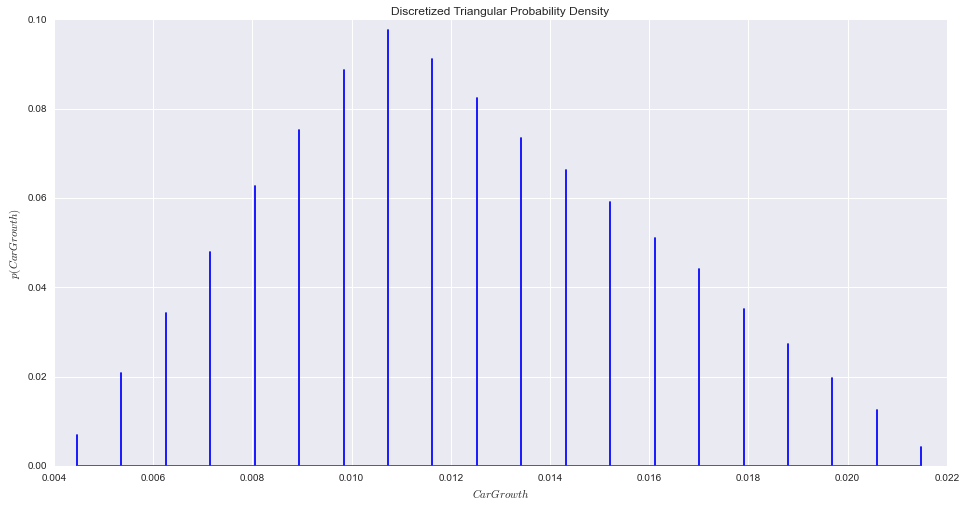

In [6]:
min_growth_car = 0.004
mean_growth_car = 0.0105
max_growth_car = 0.022
car_array = np.random.triangular(min_growth_car, mean_growth_car, max_growth_car, size = 100000)
#plt.hist(car_array, bins = 10)

car_val = np.histogram(car_array, bins = 20)
car_y = [float(i)/np.sum(car_val[0]) for i in car_val[0]]

# Binwidth issue
x_car = car_val[1]
x_3 = []
for i in range(len(x_car) - 1):
    temp = (x_car[i] + x_car[i+1])/2
    x_3.append(temp)

# Plot triangular distribution
plt.figure(figsize = (16, 8))
plt.stem(x_3, car_y, markerfmt = ' ') # This draws the intervals
plt.xlabel('$Car Growth$')
plt.ylabel('$p(Car Growth)$')
plt.title('Discretized Triangular Probability Density')

print len(x_3)
print np.sum(car_y)

**Truck VOT Growth Probability Distribution:** Triangular

20
1.0


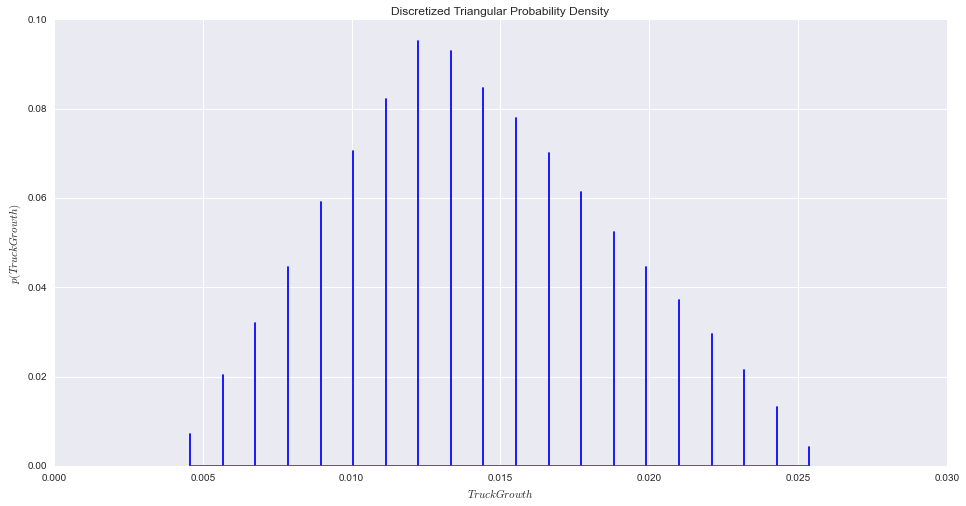

In [7]:
min_growth_truck = 0.004
mean_growth_truck = 0.0125
max_growth_truck = 0.026
truck_array = np.random.triangular(min_growth_truck, mean_growth_truck, max_growth_truck, size = 100000)
#plt.hist(car_array, bins = 10)

truck_val = np.histogram(truck_array, bins = 20)
truck_y = [float(i)/np.sum(truck_val[0]) for i in truck_val[0]]

# Binwidth issue
x_truck = truck_val[1]
x_4 = []
for i in range(len(x_truck) - 1):
    temp = (x_truck[i] + x_truck[i+1])/2
    x_4.append(temp)

# Plot triangular distribution
plt.figure(figsize = (16, 8))
plt.stem(x_4, truck_y, markerfmt = ' ') # This draws the intervals
plt.xlabel('$Truck Growth$')
plt.ylabel('$p(Truck Growth)$')
plt.title('Discretized Triangular Probability Density')

print len(x_4)
print np.sum(truck_y)

**Scenarios**

In [8]:
S = [[i, j, k, l] for i in x_1 for j in x_2 for k in x_3 for l in x_4]
print S[0]
print '\n'
print 'Number of Scenarios = ' + str(len(S))

[1, 16537.0, 0.0044605430879693462, 0.0045783845758000669]


Number of Scenarios = 864000


**Probability and Revenue Calculations for Scenarios**

In [9]:
# Constants: Base Revenue
rp_base = 99842

# Constants: Base values of variables
x_1b = 60.76
x_2b = 63635
x_3b = 0.021
x_4b = 0.025

# Constants: Elasticities of variables
e_x1 = 0.994
e_x2 = 2.57
e_x3 = 0.19
e_x4 = 0.19


revenue_S = []
prob_S = []

for i in range(len(S)):
    
    # R(s) 
    temp_rev = rp_base * (S[i][0]/x_1b)**(e_x1) * (S[i][1]/x_2b)**(e_x2) * (S[i][2]/x_3b)**(e_x3) * (S[i][3]/x_4b)**(e_x4)
    revenue_S.append(temp_rev)
    
    # Probability calculation:
    
    # Truck VOT
    p_x1 = (1/(sigma * S[i][0] * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.log(S[i][0]) - mu)/sigma) ** 2) * dx_1
    
    # Demand
    p_x2 = (1/(demand_sd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((S[i][1] - demand_mean)/demand_sd) ** 2) * dx_2
    
    # Car VOT Growth
    if S[i][2] in x_3:
        cp = x_3.index(S[i][2])
    p_x3 = car_y[cp]
    
    # Truck VOT Growth
    if S[i][3] in x_4:
        tp = x_4.index(S[i][3])
    p_x4 = truck_y[tp]
                                  
    prob_S.append(p_x1 * p_x2 * p_x3 * p_x4)
    
print 'Probability Sum = %0.4f' % np.sum(prob_S)

Probability Sum = 0.9924


In [10]:
# Sorting Result based on Revenue
output = (np.array([revenue_S, prob_S])).T
output = output[output[:, 0].argsort()]

Probability Sum = 0.9924
Demand std = 11774


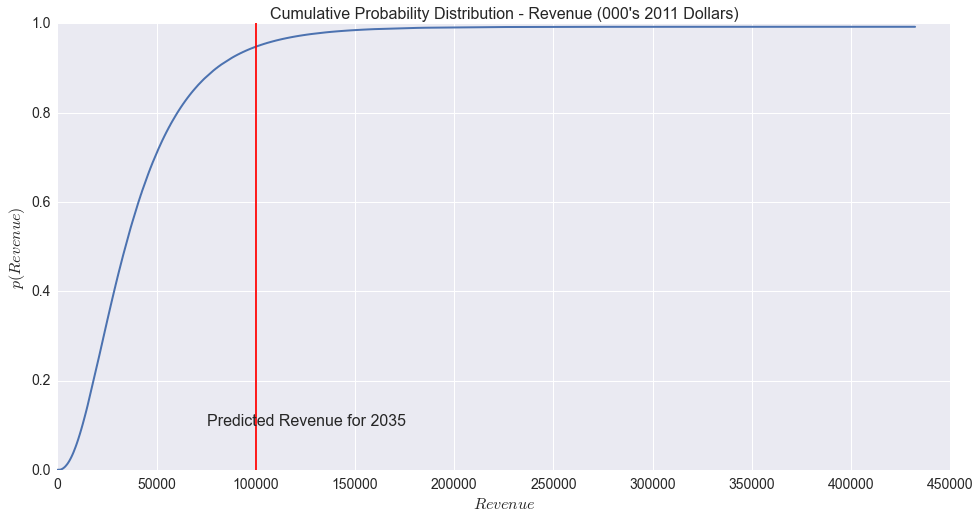

In [11]:
# Plotting Cumulative Probability Distribution
plt.figure(figsize = (16, 8))
plt.plot(output[:,0], np.cumsum(output[:,1]), linewidth = 2) # Selecting array column: array[:, column]

# Plotting Predicted Revenue
plt.axvline(x = rp_base, color = 'r')
plt.text(74754 + 500, 0.1, 'Predicted Revenue for 2035', fontsize = 16)

# Remove Scientific Notation
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)

plt.xlabel('$Revenue$', fontsize = 16)
plt.ylabel('$p(Revenue)$', fontsize = 16)
plt.title('Cumulative Probability Distribution - Revenue (000\'s 2011 Dollars)', fontsize = 16)

# Set tick label size
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

print 'Probability Sum = %0.4f' % np.sum(prob_S)
print 'Demand std = %d' % demand_sd

In [12]:
year = 2035
cum_prob = pd.DataFrame({'Revenue': output[:,0], 'Cumulative Probability': np.cumsum(output[:,1])})

# P(Revenue < r) = percentile -> Find r
# 75+
percentile_75 = cum_prob['Revenue'][cum_prob[cum_prob['Cumulative Probability'] <= 0.75].shape[0]]
percentile_85 = cum_prob['Revenue'][cum_prob[cum_prob['Cumulative Probability'] <= 0.85].shape[0]]
percentile_95 = cum_prob['Revenue'][cum_prob[cum_prob['Cumulative Probability'] <= 0.95].shape[0]]
# 25-
percentile_05 = cum_prob['Revenue'][cum_prob[cum_prob['Cumulative Probability'] <= 0.05].shape[0]]
percentile_15 = cum_prob['Revenue'][cum_prob[cum_prob['Cumulative Probability'] <= 0.15].shape[0]]
percentile_25 = cum_prob['Revenue'][cum_prob[cum_prob['Cumulative Probability'] <= 0.25].shape[0]]

# Print values
print '75th Percentile of ' + str(year) + ' Revenue = %0.2f' % percentile_75
print '85th Percentile of ' + str(year) + ' Revenue = %0.2f' % percentile_85
print '95th Percentile of ' + str(year) + ' Revenue = %0.2f' % percentile_95

print '5th Percentile of ' + str(year) + ' Revenue = %0.2f' % percentile_05
print '15th Percentile of ' + str(year) + ' Revenue = %0.2f' % percentile_15
print '25th Percentile of ' + str(year) + ' Revenue = %0.2f' % percentile_25

print percentile_95
print percentile_85
print percentile_75
print percentile_25
print percentile_15
print percentile_05

75th Percentile of 2035 Revenue = 54197.15
85th Percentile of 2035 Revenue = 68567.31
95th Percentile of 2035 Revenue = 101365.69
5th Percentile of 2035 Revenue = 9033.21
15th Percentile of 2035 Revenue = 15535.82
25th Percentile of 2035 Revenue = 20795.79
101365.68634
68567.3071847
54197.1510058
20795.7881739
15535.8241283
9033.20589693
